In [1]:
%config IPCompleter.greedy=True

In [2]:
import pandas as pd

data = pd.read_csv("sensor_data_200.txt", delimiter=" ", header=None, names=("date", "time", "ir", "lidar"))
data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
5,20180122,95835,327,212
6,20180122,95838,293,215
7,20180122,95840,309,218
8,20180122,95843,323,208
9,20180122,95846,292,217


In [3]:
print(data["lidar"][0:5])

0    214
1    211
2    199
3    208
4    212
Name: lidar, dtype: int64


In [4]:
import matplotlib.pyplot as plt
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]), align="left")
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
mean1 = sum(data["lidar"].values)/len(data["lidar"].values)
mean2 = data["lidar"].mean()
print(mean1, mean2)

209.737132976 209.73713297619855


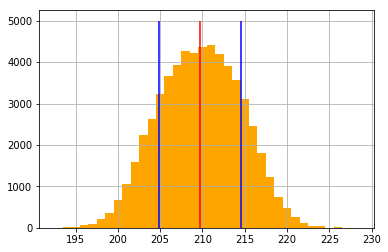

In [6]:
data["lidar"].hist(bins=max(data["lidar"])-min(data["lidar"]), color="orange", align="left")
plt.vlines(mean1, ymin=0, ymax=5000, color="red")
plt.vlines(mean1+data["lidar"].std() , ymin=0, ymax=5000, color="blue")
plt.vlines(mean1-data["lidar"].std(), ymin=0, ymax=5000, color="blue")
plt.show()

In [7]:
zs = data["lidar"].values
mean = sum(zs)/len(zs)
diff_square = [(z - mean)**2 for z in zs]

sampling_var = sum(diff_square) / len(zs)
unbiased_var = sum(diff_square) / (len(zs) - 1)

print(sampling_var)
print(unbiased_var)

pandas_sampling_var = data["lidar"].var(ddof=False)
pandas_default_var = data["lidar"].var()

print(pandas_sampling_var)
print(pandas_default_var)

import numpy as np

numpy_default_var = np.var(data["lidar"])
numpy_unbiased_var = np.var(data["lidar"], ddof=1)

print(numpy_default_var)
print(numpy_unbiased_var)

23.4077097703
23.4081065986
23.4077097703
23.40810659855441
23.407709770274106
23.40810659855441


In [8]:
import math

stddev1 = math.sqrt(sampling_var)
stddev2 = math.sqrt(unbiased_var)

pandas_stddev = data["lidar"].std()

print(stddev1)
print(stddev2)
print(pandas_stddev)

4.838151482774605
4.83819249292072
4.83819249292072


In [9]:
freqs = pd.DataFrame(data["lidar"].value_counts())
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409,4355,4261,4228,4201,3920,3897,3674,3572,3225,...,84,59,55,32,15,13,10,4,3,1


In [10]:
freqs["probs"] = freqs["lidar"] / len(data["lidar"])
freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,...,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,...,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,...,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


In [11]:
sum(freqs["probs"])

1.0

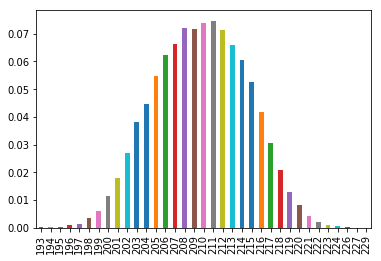

In [12]:
freqs["probs"].sort_index().plot.bar()
plt.show()

In [19]:
def drawing():
    return freqs.sample(n=1, weights="probs").index[0]

drawing()

209

In [24]:
freqs.sample(n=1, weights="probs")

,lidar,probs
204,2638,0.044721


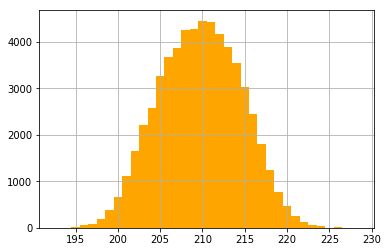

In [25]:
samples = [drawing() for i in range(len(data))]
simulated = pd.DataFrame(samples, columns=["lidar"])
p = simulated["lidar"]
p.hist(bins=max(p)-min(p), color="orange", align="left")
plt.show()

In [26]:
def p(z, mu=209.7, dev=23.4):
    return math.exp(-(z-mu)**2/(2*dev))/math.sqrt(2*math.pi*dev)

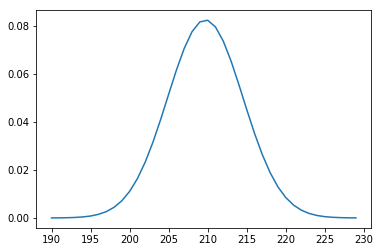

In [28]:
zs = range(190, 230)
ys = [p(z) for z in zs]

plt.plot(zs, ys)
plt.show()

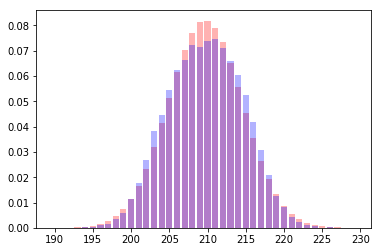

In [29]:
def prob(z, width=0.5):
    return width * (p(z - width) + p(z + width))

zs = range(190, 230)
ys = [prob(z) for z in zs]

plt.bar(zs, ys, color="red", alpha=0.3)
f = freqs["probs"].sort_index()
plt.bar(f.index, f.values, color="blue", alpha=0.3)
plt.show()